In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1:

- Load and read the dataset

In [97]:
file_path = '/Users/user/Desktop/python-tasks/test-week5/task-3/student-scores.csv'

# This reads the CSV file and loads all the rows
df = pd.read_csv(file_path)

df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


### Step 2:

- Drop columns that will not be implicated in the analysis.
- "axis=1" means drop columns (not rows).

In [98]:
primary_df = df.drop(['id', 'first_name', 'last_name', 'email'], axis=1)

primary_df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


### Step 3:

- Display (if any) missing values in the dataset to ensure the datsaset is clean.
- "isnull().sum()" checks for missing data in each column (e.g., 0 means no missing values).
- View the various data types to understand the dataset and achieve an efficient analysis.
- "dtypes" shows the type of data in each column (e.g., int64 for numbers, object for objects).

In [99]:
print("Missing values:\n", primary_df.isnull().sum())
print("\nData types:\n", primary_df.dtypes)

Missing values:
 gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

Data types:
 gender                        object
part_time_job                   bool
absence_days                   int64
extracurricular_activities      bool
weekly_self_study_hours        int64
career_aspiration             object
math_score                     int64
history_score                  int64
physics_score                  int64
chemistry_score                int64
biology_score                  int64
english_score                  int64
geography_score                int64
dtype: object


### Step 4:

- Note: part_time_job and extracurricular_activities are categorical, so we’d need to encode them.
- Convert True/False columns to a "category" type, which is better for analysis and plotting (e.g., grouping by "Yes" or "No"), although this doesn't change the output of the data.

In [100]:
primary_df['part_time_job'] = primary_df['part_time_job'].astype('category')
primary_df['extracurricular_activities'] = primary_df['extracurricular_activities'].astype('category')


### Step 5:

- Create a new column(average score).
- "subject_scores"- A list of the 7 subject score columns for easy reference.
- "primary_df['average_score']" adds a new column(average_score).
- "mean(axis=1)" calculates the average score across these subjects for each student, adding it as a new column average_score.

In [101]:
subject_scores = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 
                 'biology_score', 'english_score', 'geography_score']
primary_df['average_score'] = primary_df[subject_scores].mean(axis=1)
primary_df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,average_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,82.000000
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,91.428571
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,86.428571
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86,78.714286
4,male,False,5,False,10,Unknown,84,77,65,65,80,74,76,74.428571


### Step 6:

#### EXPLORATORY DATA ANALYSIS

- "plt.figure(figsize=(15, 10))" sets up a big canvas (15 inches wide, 10 tall) for multiple plots.
- "for i, subject in enumerate(subject_scores, 1)" loops through the 7 subjects, numbering them 1 to 7.
- "plt.subplot(3, 3, i)" creates a 3x3 grid of small plots, placing each at position i.
- "sns.scatterplot" plots dots where x-axis is study hours and y-axis is the subject score.
- "tight_layout()" adjusts spacing so titles don’t overlap.
show(): Displays the plots.

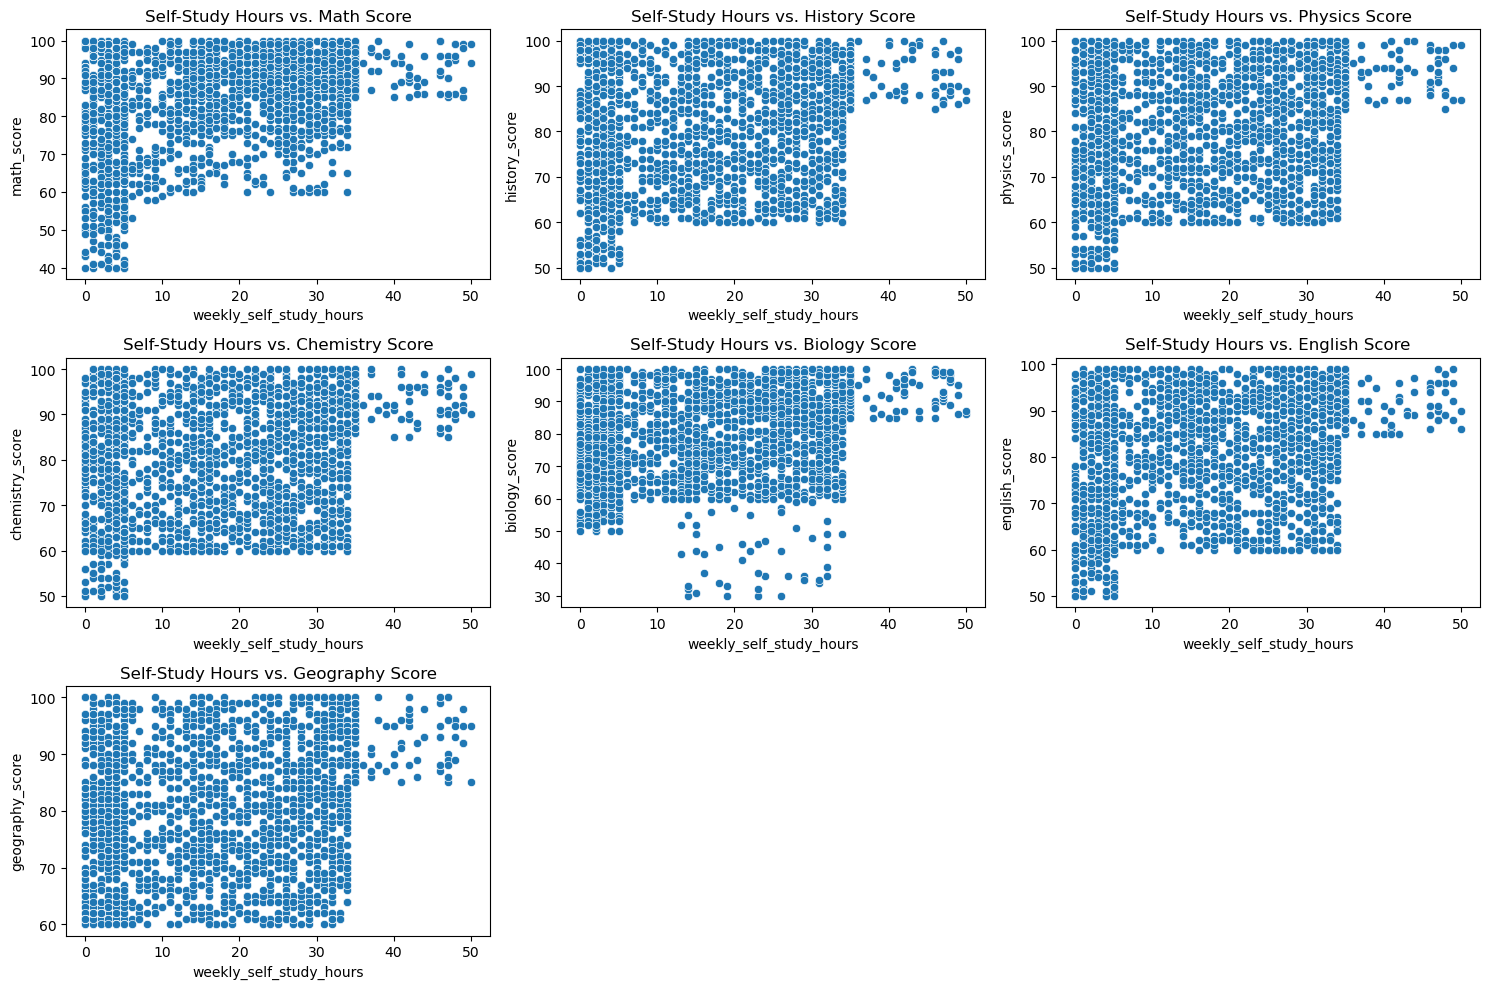

In [102]:
plt.figure(figsize=(15, 10))
for i, subject in enumerate(subject_scores, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=primary_df, x='weekly_self_study_hours', y=subject)
    plt.title(f'Self-Study Hours vs. {subject.replace("_", " ").title()}')
plt.tight_layout()
plt.show()

#### Analysis:

- There is a fairly constant relationship between the scores of different subjects and and the weekly study hours.
- General trend:
- No student with >35 hours of study had less than 80 in each subject.
- Students with >6 hours of weekly study scored above 60 in each subject(except biology).
- This deviation from the trend observed biology scores, requires further analysis.

In [103]:
# Filter for low biology performance with average study hours
low_biology_performers = primary_df[
      (primary_df['biology_score'] < 60) & 
      (primary_df['weekly_self_study_hours'] > 10) &
      (primary_df['weekly_self_study_hours'] < 40)
]

print("Low performance in biology (<60) with average study hours (>10,  <40):\n", 
      low_biology_performers.shape[0], "students found")

# Compare to those with a highigher biology performance
high_biology_performers = primary_df[
      (primary_df['biology_score'] >= 60) & 
      (primary_df['weekly_self_study_hours'] > 10) &
      (primary_df['weekly_self_study_hours'] < 40)
]
print("A higher performance in biology (>=60) with average study hours (>10, <40):\n", 
      high_biology_performers.shape[0], "students found")


Low performance in biology (<60) with average study hours (>10,  <40):
 48 students found
A higher performance in biology (>=60) with average study hours (>10, <40):
 1229 students found


- Compare this with the average scores without biology.

In [109]:
subject_scores_without_biology = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'english_score', 'geography_score']

without_biology_df = primary_df.drop(['biology_score'], axis=1)
without_biology_df['average_score_without_biology'] = primary_df[subject_scores_without_biology].mean(axis=1)
without_biology_df.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,english_score,geography_score,average_score,average_score_without_biology
0,male,False,3,False,27,Lawyer,73,81,93,97,80,87,82.000000,85.166667
1,female,False,2,False,47,Doctor,90,86,96,100,88,90,91.428571,91.666667
2,female,False,9,True,13,Government Officer,81,97,95,96,77,94,86.428571,90.000000
3,female,False,5,False,3,Artist,71,74,88,80,63,86,78.714286,77.000000
4,male,False,5,False,10,Unknown,84,77,65,65,74,76,74.428571,73.500000


In [110]:
# Filter for performance without biology with average study hours
low_performers_without_biology = without_biology_df[
      (without_biology_df['average_score_without_biology'] < 60) & 
      (without_biology_df['weekly_self_study_hours'] > 10) &
      (without_biology_df['weekly_self_study_hours'] < 40)
]

print("Low performance in other subjects (<60) with average study hours (>10,  <40):\n", 
      low_performers_without_biology.shape[0], "students found")

# Compare to those with a higher average performance
high_performers_without_biology = without_biology_df[
      (without_biology_df['average_score_without_biology'] >= 60) & 
      (without_biology_df['weekly_self_study_hours'] > 10) &
      (without_biology_df['weekly_self_study_hours'] < 40)
]
print("A higher performance in other subjects (>=60) with average study hours (>10, <40):\n", 
      high_performers_without_biology.shape[0], "students found")

Low performance in other subjects (<60) with average study hours (>10,  <40):
 0 students found
A higher performance in other subjects (>=60) with average study hours (>10, <40):
 1277 students found


##### Interpretation:

- A FEW students found difficulty in getting good grades in biology with average study hours compared to other subjects.

### Step 7:

#### Correlation matrix to visualize the relationship between variables.

- "corr()" calculates how much each pair of columns moves together (e.g., 0.6 means a strong positive link).
- "+ subject_scores" combines the list of subjects with other key columns.
- "plt.figure(figsize=(12, 8))" sets a larger canvas for the heatmap.
- "sns.heatmap" shows a color grid where:
- "annot=True" adds numbers to each cell.
- "cmap='coolwarm'" uses red-blue colors.
- "center=0" zero is neutral (white).

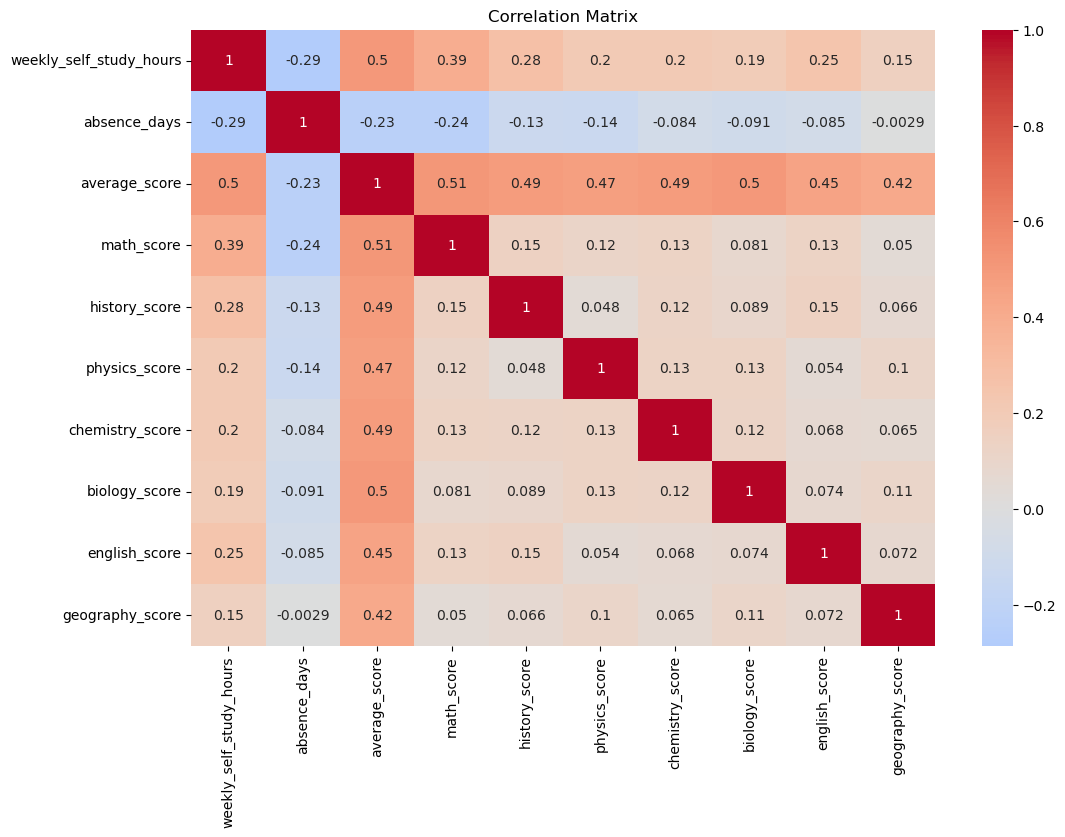

Correlations with self-study hours:
 weekly_self_study_hours    1.000000
math_score                 0.393569
history_score              0.276231
english_score              0.247796
physics_score              0.202120
chemistry_score            0.201340
biology_score              0.190481
geography_score            0.153622
Name: weekly_self_study_hours, dtype: float64


In [113]:
correlation_matrix = primary_df[['weekly_self_study_hours', 'absence_days', 'average_score'] + subject_scores].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

correlations = primary_df[['weekly_self_study_hours'] + subject_scores].corr()['weekly_self_study_hours'].sort_values(ascending=False)
print("Correlations with self-study hours:\n", correlations)

#### Analysis:

- There exist a relationship between weekly study hours and average score, due to a correlation value of 0.5
- The correlation values in descending order suggests the relatively strong relationship between weekly self study hours and each subject.

### Step 8:

#### To analyze the relationship between average score and other top factors that may influence performance.

In [114]:
correlations_with_average = primary_df[['absence_days', 'weekly_self_study_hours', 'part_time_job', 'extracurricular_activities', 'average_score']].corr()['average_score'].sort_values(ascending=False)
print("Top factors influencing average score:\n", correlations_with_average)

Top factors influencing average score:
 average_score                 1.000000
weekly_self_study_hours       0.501520
extracurricular_activities   -0.031952
part_time_job                -0.192846
absence_days                 -0.232868
Name: average_score, dtype: float64


- Based on these correlation values, the only variable having a direct impact on the average score is the weekly study hours.
- This could be further visualized by the plots below

#### 1. Average score vs self study hours

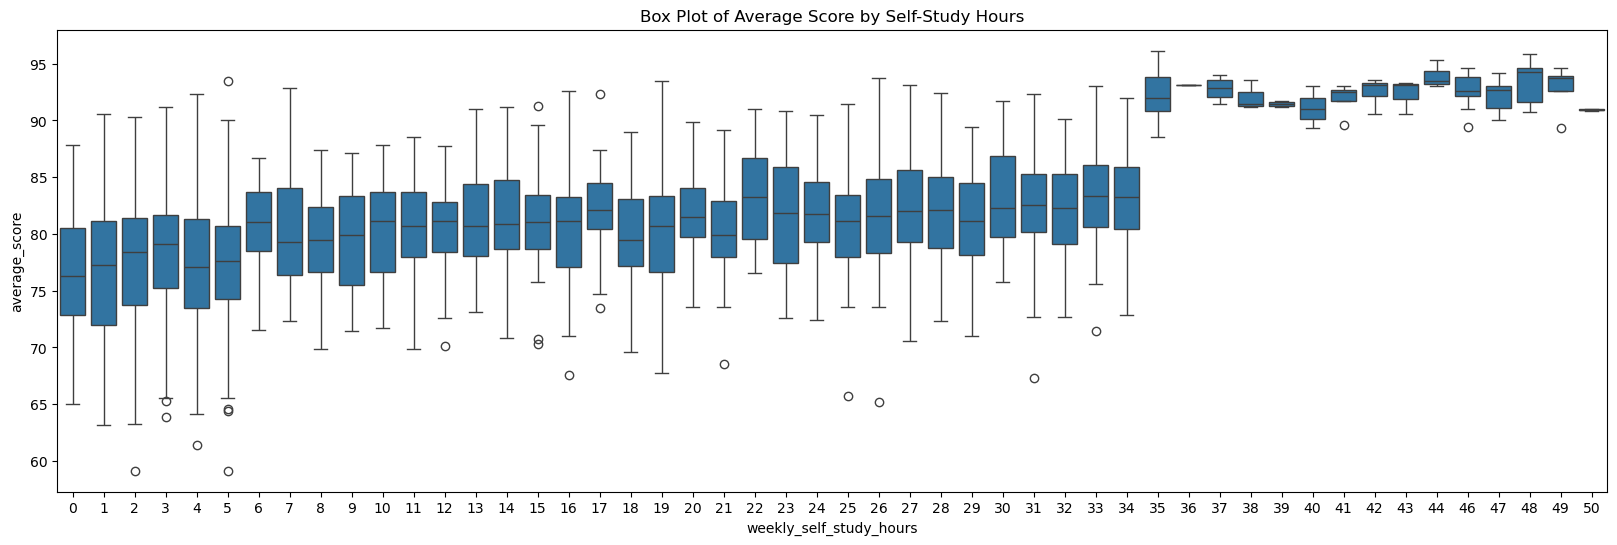

In [54]:
plt.figure(figsize=(20, 6))
sns.boxplot(data=primary_df, x='weekly_self_study_hours', y='average_score')
plt.title('Box Plot of Average Score by Self-Study Hours')
plt.show()

#### Boxplot: Shows a box for each study hour value:
- Middle line = median score.
- Box edges = 25th to 75th percentiles.
- Whiskers = range of typical scores.
- Dots = outliers (unusual cases).
- Helps spot if high scores occur with low study hours.

#### Interpretation:

- This shows that no student who studied 35 hours and above in a week got an average score less than 85.
- It also shows a distribution of average scores in students who studied less than 35 hours per week, with some extremely high scores(represented as whiskers and dots) associated with low study hours, which leads to further analysis below.

In [115]:
high_score_low_study = primary_df[(primary_df['average_score'] > 85) & (primary_df['weekly_self_study_hours'] <= 5)]
print("Students with high scores (>85) but low study hours (<=5):\n", high_score_low_study.shape[0], "students found")

Students with high scores (>85) but low study hours (<=5):
 48 students found


#### Outliers

- This shows there are some students who had less study time, but still had outstanding performances, which could be as a result of high intelligence and cognitive abilities, efficient study techniques, strong foundational knowledge, efficient time management, fast assimilation or a variety of other factors not accounted for in the dataset

#### 2. Average score vs Part time job status

- 2a. With a third variable(weekly_self_study_hours), using scatter plot.

- This plots individual students’ study hours against their scores, colored by job status.
- "hue='part_time_job'" colors dots—e.g., blue for False, orange for True.
- "alpha=0.6" makes dots semi-transparent to see overlaps.

#### Analysis:
- Reveals if study habits differ by job status and how they relate to scores (e.g., do job holders study less but still score high?).

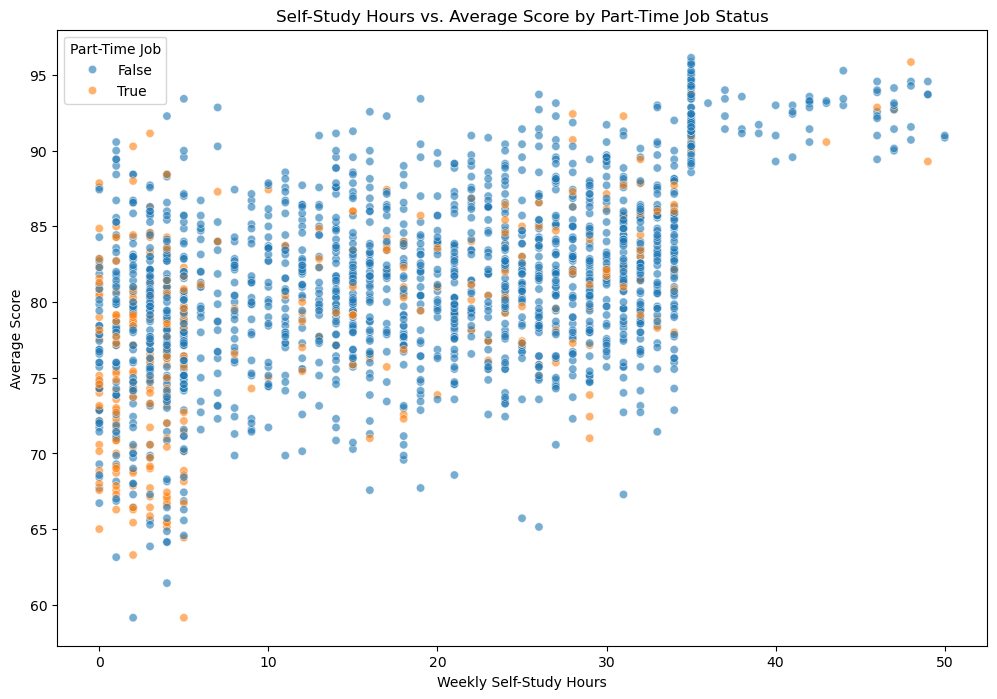

In [116]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=primary_df, x='weekly_self_study_hours', y='average_score', hue='part_time_job', alpha=0.6)
plt.title('Self-Study Hours vs. Average Score by Part-Time Job Status')
plt.xlabel('Weekly Self-Study Hours')
plt.ylabel('Average Score')
plt.legend(title='Part-Time Job')
plt.show()

#### Interpretation:

- There is a disproportionate amount of students with part-time job(represented by the orange dots) studying for shorter periods of time than those studying for longer periods of time.
- The job status of a student doesn't have a negative impact on the performance, provided the student studies for more than 35 hours per week.
- Some students with part-time jobs still performed excellently (90+), despite studying for shorter periods of time.

- 2b.  With a third variable(weekly_self_study_hours), filtering, and counting.

- Finds students who excel despite low study time, split by job status.
- Filtering:
- (primary_df['average_score'] > 85): Scores above 85.
- (primary_df['part_time_job'] == True): Has a job (or False for no job).
- (primary_df['weekly_self_study_hours'] < 10): Less than 10 hours of study.
- "&": Combines conditions (all must be true).
- "shape[0]" counts matching students (rows).

- This checks for surprising cases—e.g., do job holders still perform well with little study?

In [121]:
# Filter for high performers with part-time jobs and low study hours
high_performers_jobs = primary_df[(primary_df['average_score'] > 85) & (primary_df['part_time_job'] == True) & 
                          (primary_df['weekly_self_study_hours'] < 10)]
print("High performers (>85) with part-time jobs and low study hours (<10):\n", 
      high_performers_jobs.shape[0], "students found")

# Compare to those without jobs
high_performers_no_jobs = primary_df[(primary_df['average_score'] > 85) & (primary_df['part_time_job'] == False) & 
                             (primary_df['weekly_self_study_hours'] < 10)]
print("High performers (>85) without jobs and low study hours (<10):\n", 
      high_performers_no_jobs.shape[0], "students found")

# Filter for low performers with part-time jobs and low study hours
low_performers_jobs = primary_df[(primary_df['average_score'] < 65) & (primary_df['part_time_job'] == True) & 
                          (primary_df['weekly_self_study_hours'] < 10)]
print("Low performers (<65) with part-time jobs and low study hours (<10):\n", 
      low_performers_jobs.shape[0], "students found")

# Compare to those without jobs
low_performers_no_jobs = primary_df[(primary_df['average_score'] < 65) & (primary_df['part_time_job'] == False) & 
                             (primary_df['weekly_self_study_hours'] < 10)]
print("Low performers (<65) without jobs and low study hours (<10):\n", 
      low_performers_no_jobs.shape[0], "students found")

High performers (>85) with part-time jobs and low study hours (<10):
 7 students found
High performers (>85) without jobs and low study hours (<10):
 53 students found
Low performers (<65) with part-time jobs and low study hours (<10):
 3 students found
Low performers (<65) without jobs and low study hours (<10):
 8 students found


- 2c. With a third variable(weekly_self_study_hours), using barplot.

- Shows the counts in a bar chart.

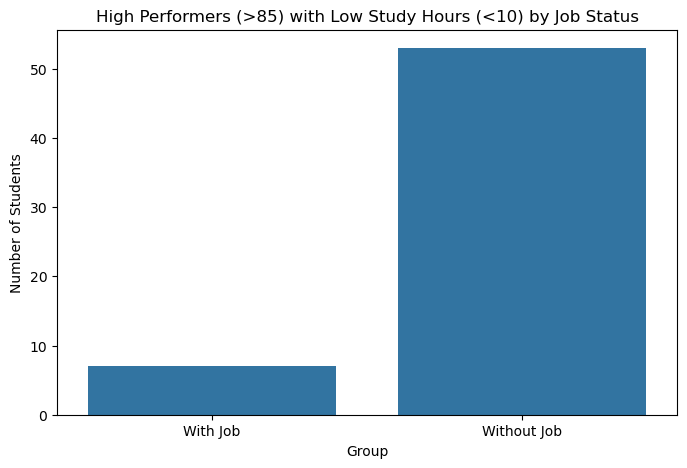

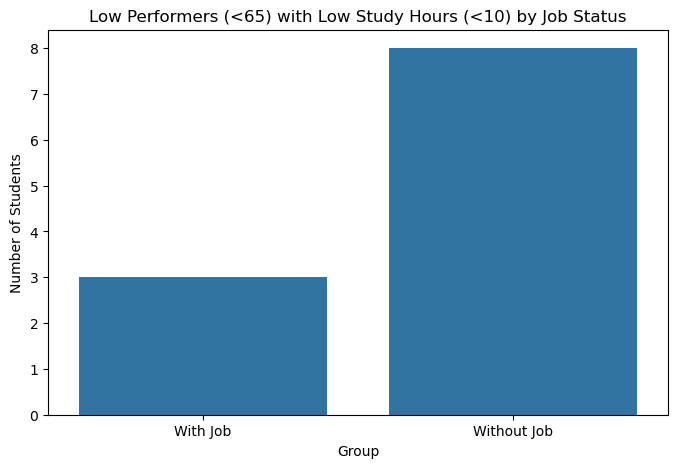

In [119]:
# Visualize unexpected trend with a bar chart
trend_data = pd.DataFrame({
    'Group': ['With Job', 'Without Job'],
    'Count': [high_performers_jobs.shape[0], high_performers_no_jobs.shape[0]]
})
plt.figure(figsize=(8, 5))
sns.barplot(data=trend_data, x='Group', y='Count')
plt.title('High Performers (>85) with Low Study Hours (<10) by Job Status')
plt.ylabel('Number of Students')
plt.show()

# To visualize low performance students with low study hours
trend_data_1 = pd.DataFrame({
    'Group': ['With Job', 'Without Job'],
    'Count': [low_performers_jobs.shape[0], low_performers_no_jobs.shape[0]]
})
plt.figure(figsize=(8, 5))
sns.barplot(data=trend_data_1, x='Group', y='Count')
plt.title('Low Performers (<65) with Low Study Hours (<10) by Job Status')
plt.ylabel('Number of Students')
plt.show()

#### Interpretation

- Among students who have a high performance, there exists a sharp disproportionality between those who have part time jobs, and those who don't.
- Although there are students who are high performers, while studying for less hours, a minor fraction still exists, of students with high efficiencies, managing part-time jobs while excelling academically.
- Out of the students who study for low hours, there are students(about 8) without jobs who still perform poorly than those with jobs. This may be due to a variety of reasons.
- While a student may perform well with low study hours, the performance is not a direct consequence of the job status of the student; if it were, the proportion of students without jobs and low study hours with low performance, would be less than those who have jobs, study for less hours, and still end up with low performance. However, the proportion is inverse, which buttresses the point that job status is not a performance indicator.

- 2d. Average score vs part-time job status(alone), using boxplot

- Box parts:
- Middle line = median score.
- Box edges = 25th to 75th percentiles (middle 50% of scores).
- Whiskers = range of typical scores.
- Dots = outliers (unusual scores).

- This plot highlights variability and outliers—e.g., are there more high-scoring students with jobs? Or, are there more low-scoring students without jobs?

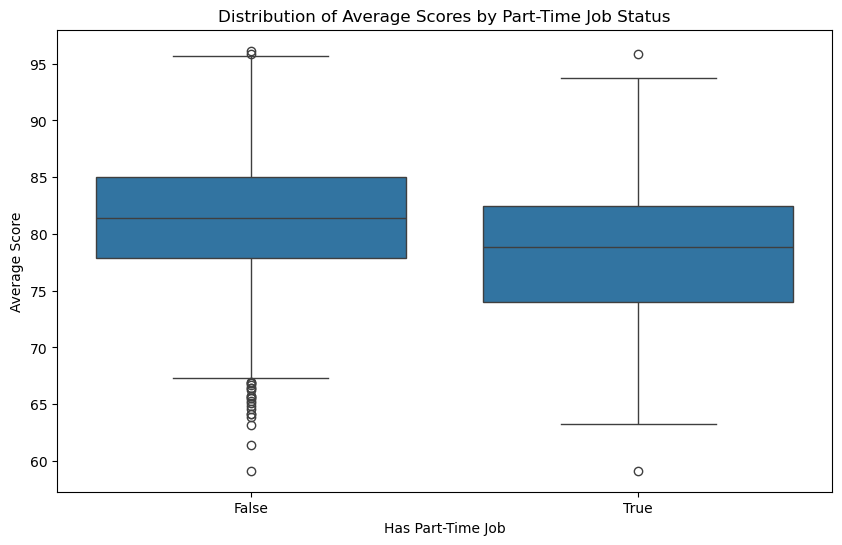

In [120]:
# Box plot: Distribution of average scores by part-time job status
plt.figure(figsize=(10, 6))
sns.boxplot(data=primary_df, x='part_time_job', y='average_score')
plt.title('Distribution of Average Scores by Part-Time Job Status')
plt.xlabel('Has Part-Time Job')
plt.ylabel('Average Score')
plt.show()

#### Interpretation:

- The distribution of students with highest average scores have no part time jobs
- While having Part-time job affected the average performance, it is not a major determinant of the performance of a student, since the range of typical scores are fairly identical.


#### 3. Average score vs Absence days

- 3a. Average score vs Absense days, using bar plot.

- First: Group absence days into ranges and shows average scores per group.
- Binning:
- "pd.cut" splits absence_days into bins (e.g., 0-2, 3-4, up to 12+).
- "bins=[0, 2, ..., float('inf')]" defines ranges, with inf catching anything over 12.
- "labels=['0-2', ...]" names each bin for the x-axis.
- "primary_df['absence_bins']" adds a new column "absence_bins".
- "xticks(rotation=45)" angles labels 45 degrees to fit the x axis ticks.
- This plot shows trends more clearly.

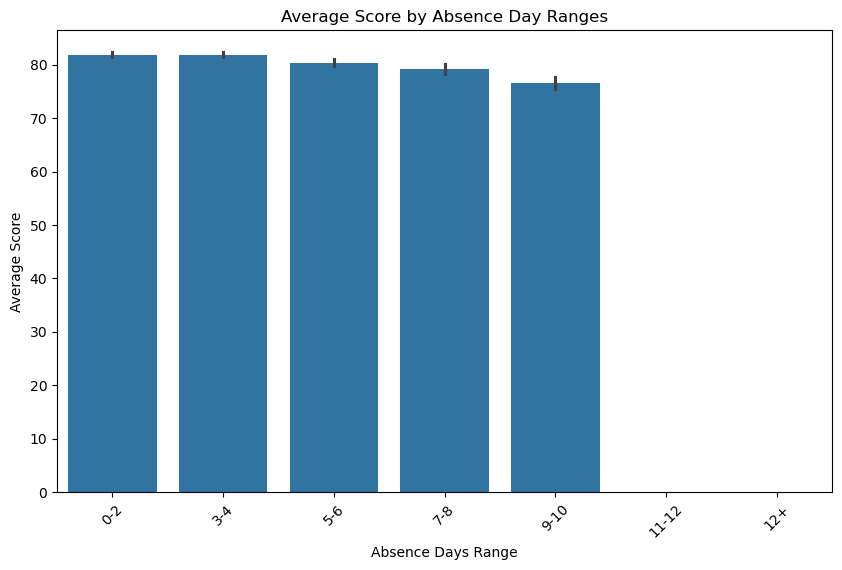

In [123]:
# Bar chart: Average score by absence day bins
primary_df['absence_bins'] = pd.cut(primary_df['absence_days'], bins=[0, 2, 4, 6, 8, 10, 12, float('inf')], labels=['0-2', '3-4', '5-6', '7-8', '9-10', '11-12', '12+'])
plt.figure(figsize=(10, 6))
sns.barplot(data=primary_df, x='absence_bins', y='average_score')
plt.title('Average Score by Absence Day Ranges')
plt.xlabel('Absence Days Range')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

#### Interpretation:

- This plot shows a slightly downward trend with increasing Absent days.

- 3b. Average score vs Absense days, using boxplot.

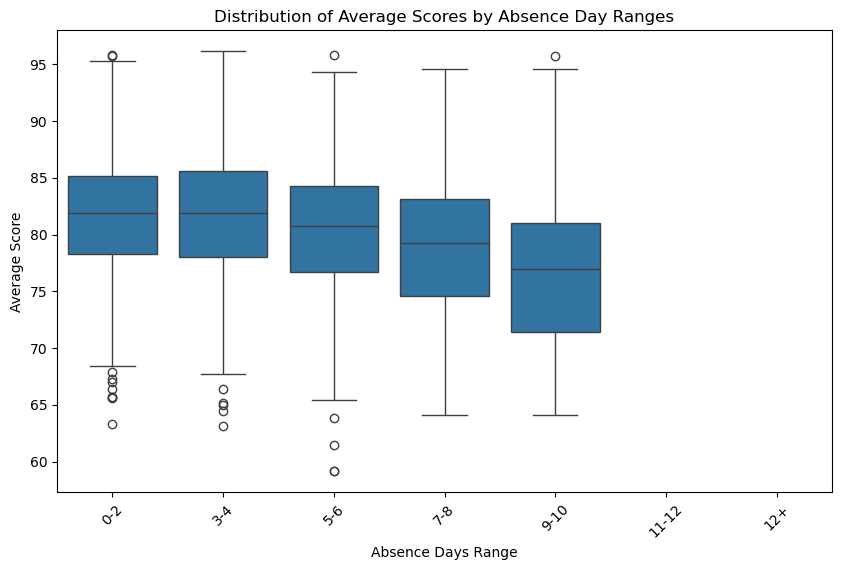

In [77]:
# Box plot: Distribution of average scores by absence bins
plt.figure(figsize=(10, 6))
sns.boxplot(data=primary_df, x='absence_bins', y='average_score')
plt.title('Distribution of Average Scores by Absence Day Ranges')
plt.xlabel('Absence Days Range')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

#### Interpretation:

- There is a higher average score for students who rarely missed classes.
- While this relationship between the average score and absent days is one of inverse proportionality, there exist outliers
- Outliers:
- Students who rarely missed classes and had relatively average scores.
- Students who missed lots of classes and had outstanding scores. The filtered data is expressed and displayed below.

In [124]:
# Filter for high performers with high absence days
high_performers_high_absence = primary_df[(primary_df['average_score'] > 85) & (primary_df['absence_days'] > 6)]
print("High performers (>85) with high absence days (>6):\n", 
      high_performers_high_absence.shape[0], "students found")

# Filter low performance with high absense days
low_performers_high_absence = primary_df[(primary_df['average_score'] < 65 ) & (primary_df['absence_days'] > 6)]
print("Low performers (<65) with high absense days (>6):\n",
      low_performers_high_absence.shape[0], "students found")

# Compare high performance with low absence days
high_performers_low_absence = primary_df[(primary_df['average_score'] > 85) & (primary_df['absence_days'] <= 5)]
print("High performers (>85) with low absence days (<=5):\n", 
      high_performers_low_absence.shape[0], "students found")

# Compare low peformance with low absence days
low_performers_low_absence = primary_df[(primary_df['average_score'] < 65) & (primary_df['absence_days'] <= 5)]
print("Low performers (<65) with low absence days (<=5):\n", 
      low_performers_low_absence.shape[0], "students found")

High performers (>85) with high absence days (>6):
 48 students found
Low performers (<65) with high absense days (>6):
 4 students found
High performers (>85) with low absence days (<=5):
 393 students found
Low performers (<65) with low absence days (<=5):
 3 students found


#### 4. Average score vs Extracurricular Activities

- Average score vs Absense days, using bar plot.

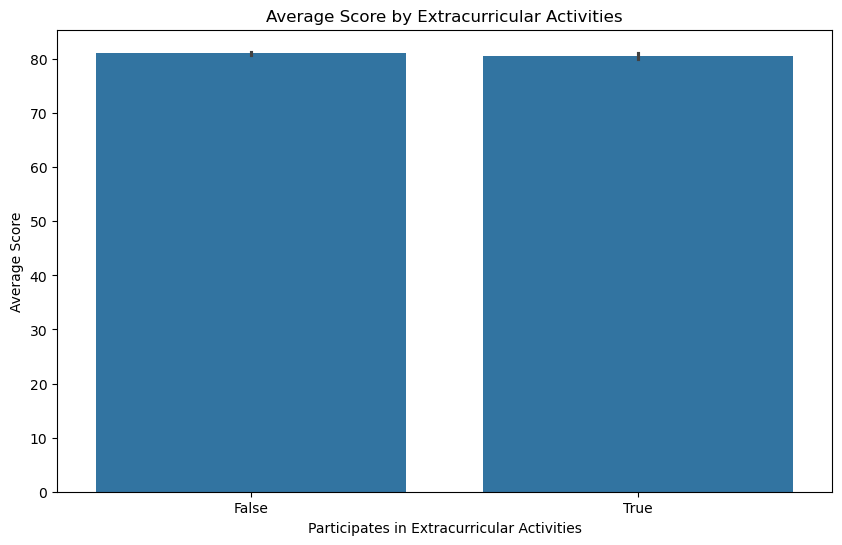

In [82]:
# Bar chart: Average score by extracurricular activities
plt.figure(figsize=(10, 6))
sns.barplot(data=primary_df, x='extracurricular_activities', y='average_score')
plt.title('Average Score by Extracurricular Activities')
plt.xlabel('Participates in Extracurricular Activities')
plt.ylabel('Average Score')
plt.show()

#### Interpretation:

This plot, together with the correlation factor of -0.232868(done earlier) gives the indication that there is little or no relationship between both variables(Extracurricular Activities and Average Score).